In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d whenamancodes/students-performance-in-exams

  0% 0.00/8.67k [00:00<?, ?B/s]
100% 8.67k/8.67k [00:00<00:00, 6.22MB/s]


In [6]:
! unzip -d whenamancodes/students-performance-in-exams

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

In [7]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
import seaborn as sns

In [8]:
student_df = pd.read_csv('/content/students-performance-in-exams.zip')
print('shape:', student_df.shape)
print('Number of rows:', student_df.shape[0])
print('Number of columns:', student_df.shape[1])

shape: (1000, 8)
Number of rows: 1000
Number of columns: 8


## Dataset of Students Performance in Exams

## Population = 1000 students

In [9]:
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [10]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [11]:
student_df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82
999,male,group A,some college,standard,completed,65,60,62


In [12]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### the descriptive statistics of my dataset

In [13]:
# get to the columns of DF
all_columns = student_df.columns # get all columns property
print('\nColumns of the DataFrame:\n', all_columns)


Columns of the DataFrame:
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [14]:
# look if we have any missing values in our Data Frame
student_df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [15]:
# get the numbers of null entries per column
student_df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Number of male and Female that sat for the exams

In [16]:
student_df.gender.value_counts()

male      517
female    483
Name: gender, dtype: int64

### To find the number of students from different ethnic groups

In [17]:
student_df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [18]:
student_df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [19]:
student_df.mode()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some college,standard,none,63.0,71.0,64
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71


### intepretation of the mode, means that male were most students that took the exam, Group C are more in the area of race, most parents have some college level of education, lunch is standard, most students failed the exam

### To calculate the average of the three subjects of all students

In [20]:
student_df['Total_Avg_Score'] = student_df.mean(axis = 1)
student_df

<ipython-input-20-b630e8f0f069>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  student_df['Total_Avg_Score'] = student_df.mean(axis = 1)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Avg_Score
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.333333
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.333333
997,female,group C,some high school,free/reduced,none,32,35,41,36.000000
998,female,group C,some college,standard,none,73,74,82,76.333333


### Assuming that a student must score minimum of average score of 75

### lets find the number of students that passed

In [21]:
student_df['Academic status'] = np.where(student_df['Total_Avg_Score']>= 75, "Passed", "Failed")
student_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Avg_Score,Academic status
0,male,group A,high school,standard,completed,67,67,63,65.666667,Failed
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,Failed
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,Failed
3,male,group B,high school,standard,none,77,78,68,74.333333,Failed
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,Failed
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.333333,Failed
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.333333,Passed
997,female,group C,some high school,free/reduced,none,32,35,41,36.000000,Failed
998,female,group C,some college,standard,none,73,74,82,76.333333,Passed


### statistics of students from different enthic groups

In [22]:
group_A = student_df[student_df['race/ethnicity'].str.contains('group A')]
group_A

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Avg_Score,Academic status
0,male,group A,high school,standard,completed,67,67,63,65.666667,Failed
6,female,group A,bachelor's degree,standard,none,62,59,63,61.333333,Failed
29,female,group A,some high school,free/reduced,none,33,54,51,46.000000,Failed
31,male,group A,bachelor's degree,free/reduced,none,78,74,73,75.000000,Passed
32,male,group A,some high school,free/reduced,completed,40,41,39,40.000000,Failed
...,...,...,...,...,...,...,...,...,...,...
966,female,group A,some high school,free/reduced,completed,55,73,70,66.000000,Failed
983,male,group A,some high school,standard,none,58,50,47,51.666667,Failed
987,male,group A,some college,standard,completed,78,78,74,76.666667,Passed
993,female,group A,associate's degree,standard,none,58,54,58,56.666667,Failed


In [23]:
group_A.describe()

,math score,reading score,writing score,Total_Avg_Score
count,79.000000,79.000000,79.000000,79.000000
mean,65.215190,68.556962,66.974684,66.915612
std,14.390765,15.946824,16.374601,14.986933
min,33.000000,33.000000,32.000000,36.666667
25%,53.500000,59.000000,56.500000,56.333333
50%,65.000000,70.000000,67.000000,66.333333
75%,77.000000,78.000000,78.000000,77.500000
max,94.000000,100.000000,100.000000,98.000000


In [24]:
group_B = student_df[student_df['race/ethnicity'].str.contains('group B')]
group_B

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Avg_Score,Academic status
3,male,group B,high school,standard,none,77,78,68,74.333333,Failed
16,male,group B,high school,standard,none,58,47,42,49.000000,Failed
22,male,group B,some college,standard,completed,71,69,73,71.000000,Failed
23,female,group B,some college,free/reduced,none,44,55,54,51.000000,Failed
28,female,group B,high school,standard,completed,74,89,89,84.000000,Passed
...,...,...,...,...,...,...,...,...,...,...
969,male,group B,high school,standard,none,67,57,52,58.666667,Failed
974,female,group B,some high school,standard,none,59,59,58,58.666667,Failed
976,female,group B,some college,free/reduced,completed,31,29,35,31.666667,Failed
979,female,group B,bachelor's degree,free/reduced,completed,57,65,68,63.333333,Failed


In [25]:
group_B.describe()

,math score,reading score,writing score,Total_Avg_Score
count,205.000000,205.000000,205.000000,205.000000
mean,63.170732,67.102439,65.736585,65.336585
std,14.469207,13.809426,14.866361,13.618958
min,25.000000,28.000000,23.000000,29.333333
25%,53.000000,58.000000,57.000000,57.333333
50%,63.000000,66.000000,66.000000,64.333333
75%,75.000000,77.000000,76.000000,75.666667
max,99.000000,98.000000,100.000000,98.000000


In [26]:
group_C = student_df[student_df['race/ethnicity'].str.contains('group C')]
group_C

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Avg_Score,Academic status
9,male,group C,some college,free/reduced,none,47,42,45,44.666667,Failed
13,male,group C,high school,standard,completed,74,74,73,73.666667,Failed
17,female,group C,associate's degree,standard,completed,54,62,65,60.333333,Failed
18,female,group C,associate's degree,free/reduced,none,23,44,44,37.000000,Failed
19,male,group C,some college,free/reduced,none,39,32,31,34.000000,Failed
...,...,...,...,...,...,...,...,...,...,...
991,female,group C,associate's degree,standard,none,87,93,88,89.333333,Passed
992,male,group C,some college,standard,none,69,63,66,66.000000,Failed
995,male,group C,high school,standard,none,73,70,65,69.333333,Failed
997,female,group C,some high school,free/reduced,none,32,35,41,36.000000,Failed


In [27]:
group_C.describe()

,math score,reading score,writing score,Total_Avg_Score
count,323.000000,323.000000,323.000000,323.000000
mean,63.130031,66.383901,64.523220,64.679051
std,15.071315,14.648087,15.643404,14.394347
min,13.000000,27.000000,23.000000,21.666667
25%,53.000000,56.000000,53.000000,55.166667
50%,64.000000,67.000000,65.000000,65.000000
75%,74.000000,76.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000,97.666667


In [28]:
group_D = student_df[student_df['race/ethnicity'].str.contains('group D')]
group_D

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Avg_Score,Academic status
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,Failed
5,female,group D,high school,standard,none,63,77,76,72.000000,Failed
8,male,group D,high school,standard,none,63,56,65,61.333333,Failed
11,female,group D,high school,standard,completed,80,87,90,85.666667,Passed
12,male,group D,associate's degree,standard,completed,77,87,85,83.000000,Passed
...,...,...,...,...,...,...,...,...,...,...
970,female,group D,some high school,standard,completed,85,100,97,94.000000,Passed
984,female,group D,high school,standard,none,63,71,75,69.666667,Failed
989,male,group D,some college,standard,completed,70,60,65,65.000000,Failed
990,male,group D,some college,standard,none,67,55,53,58.333333,Failed


In [29]:
group_D.describe()

,math score,reading score,writing score,Total_Avg_Score
count,262.000000,262.000000,262.000000,262.000000
mean,69.267176,72.087786,72.259542,71.204835
std,14.723414,14.305236,14.665406,13.796336
min,13.000000,36.000000,37.000000,28.666667
25%,60.250000,63.000000,62.250000,62.083333
50%,70.000000,71.500000,72.000000,71.166667
75%,80.750000,84.000000,83.750000,81.583333
max,100.000000,100.000000,100.000000,100.000000


In [30]:
group_E = student_df[student_df['race/ethnicity'].str.contains('group E')]
group_E

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Avg_Score,Academic status
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,Failed
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,Failed
7,male,group E,some college,standard,completed,93,88,84,88.333333,Passed
10,male,group E,some college,standard,completed,99,83,85,89.000000,Passed
14,male,group E,some high school,standard,completed,81,87,85,84.333333,Passed
...,...,...,...,...,...,...,...,...,...,...
967,female,group E,master's degree,free/reduced,none,84,100,99,94.333333,Passed
972,female,group E,associate's degree,standard,none,81,77,74,77.333333,Passed
985,male,group E,associate's degree,standard,none,74,73,67,71.333333,Failed
986,male,group E,some college,free/reduced,none,78,84,77,79.666667,Passed


In [31]:
group_E.describe()

,math score,reading score,writing score,Total_Avg_Score
count,131.000000,131.000000,131.00000,131.000000
mean,74.465649,72.526718,70.21374,72.402036
std,15.701689,14.842418,15.65248,14.791931
min,33.000000,32.000000,32.00000,33.333333
25%,63.000000,62.000000,59.50000,62.000000
50%,75.000000,73.000000,71.00000,73.666667
75%,86.000000,83.500000,82.00000,84.333333
max,100.000000,100.000000,100.00000,100.000000


### Data Visualization

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

In [33]:
pass_df = student_df['Total_Avg_Score']

In [34]:
hist, bin_edges = np.histogram(pass_df, bins = 6)

In [35]:
hist

array([ 15,  82, 214, 337, 254,  98])

In [36]:
bin_edges

array([ 21.66666667,  34.72222222,  47.77777778,  60.83333333,
        73.88888889,  86.94444444, 100.        ])

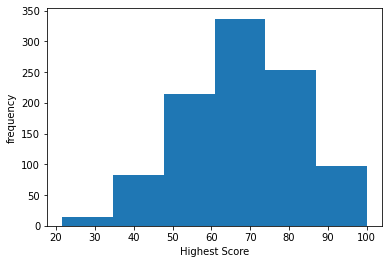

In [37]:
fig, ax = plt.subplots()
ax.hist(pass_df, bin_edges, cumulative = False)
ax.set_xlabel('Highest Score')
ax.set_ylabel('frequency')
plt.show()

### BAR CHART to show the ethnicity among the students

In [38]:
from matplotlib.pyplot import pie, show
import plotly.express as px

In [39]:
num_of_students = np.array([79, 131, 205, 262, 323])

In [40]:
fig3 = px.pie(student_df, values = student_df['race/ethnicity'].value_counts().values, 
              names = student_df['race/ethnicity'].value_counts().index)
fig3.show()

### Ethnicity Group E is the largest ethnicity group that sat for the exam, while ethnic group A are the smallest

In [41]:
# calculatig the correlation
student_df.corr()

,math score,reading score,writing score,Total_Avg_Score
math score,1.000000,0.819398,0.805944,0.919834
reading score,0.819398,1.000000,0.954274,0.970219
writing score,0.805944,0.954274,1.000000,0.966367
Total_Avg_Score,0.919834,0.970219,0.966367,1.000000


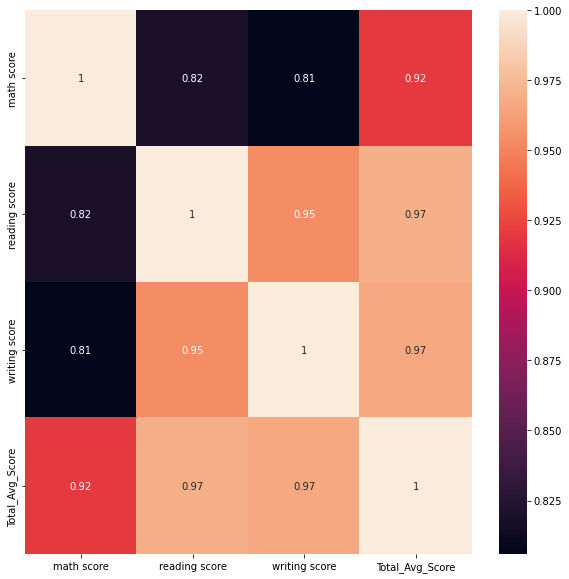

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(student_df.corr(), annot=True,annot_kws={'fontsize':10})
plt.show()

In [43]:
ethnic = ['group A', 'group B', 'group C', 'group D', 'group E']
math_score = [65.215190, 63.170732, 63.130031, 69.267176, 74.465649]

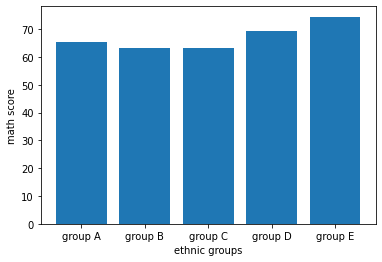

In [44]:
fig, ax = plt.subplots()
ax.bar(ethnic, math_score)
ax.set_xlabel('ethnic groups')
ax.set_ylabel('math score')
plt.show()

### from the above bar chart it can be seen that ethnic group E scored highest in math

In [45]:
ethnic = ['group A', 'group B', 'group C', 'group D', 'group E']
reading_score = [68.556962, 67.102439, 66.383901, 72.087786, 72.526718]

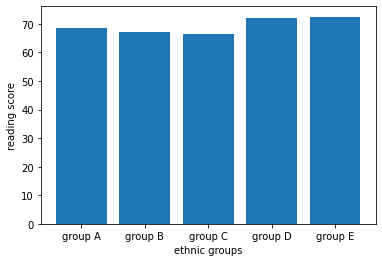

In [46]:
fig, ax = plt.subplots()
ax.bar(ethnic, reading_score)
ax.set_xlabel('ethnic groups')
ax.set_ylabel('reading score')
plt.show()

### from the above bar chart it can be seen that ethnic group E & group D scored highest in reading test

In [47]:
ethnic = ['group A', 'group B', 'group C', 'group D', 'group E']
writing_score = [66.974684, 66.974684, 64.523220, 72.259542, 70.21374]

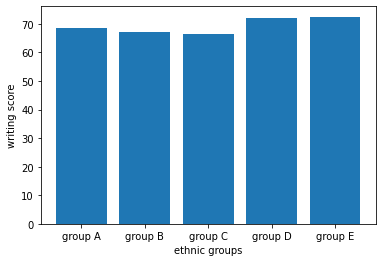

In [48]:
fig, ax = plt.subplots()
ax.bar(ethnic, reading_score)
ax.set_xlabel('ethnic groups')
ax.set_ylabel('writing score')
plt.show()

### from the above bar chart it can be seen that ethnic group D scored highest in writing test

### HYPOTHESIS TESTING

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



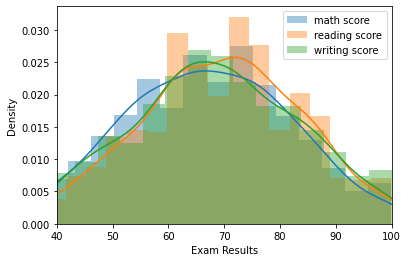

In [49]:
sns.distplot(student_df['math score'], label = 'math score')
sns.distplot(student_df['reading score'], label = 'reading score')
sns.distplot(student_df['writing score'], label = 'writing score')
plt.xlim(40, 100)
plt.xlabel('Exam Results')
plt.legend();

### SCATTER PLOT

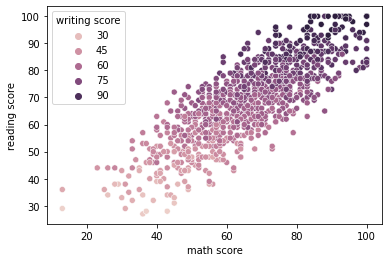

In [50]:
sns.scatterplot(x = student_df['math score'], 
                y = student_df['reading score'], 
                hue = student_df['writing score'])

### The above histogram shows that there is no significant mean difference among the students assessment in the area of maths, reading and writing

### Hypothesis 1: 

There is no difference in means of student performance in any of the math, reading and writing subjects.


### SIGNIFICANCE LEVEL

### H0: There is no difference in performance of students between math, reading and writing subjects.

### H1: There is a difference in performance of students between math, reading and writing subjects.



### To Verify F score and finding f critical value

In [51]:
# to find the total mean
mean_math = np.mean(student_df['math score'])
mean_reading = np.mean(student_df['reading score'])
mean_writing = np.mean(student_df['writing score'])
mean_total = (mean_math + mean_reading + mean_writing)/3
print('mean for math score: ', mean_math, '\n', 'mean for reading score: ', mean_reading, '\n', 'mean for writing score', mean_writing, '\n')
print('Total mean ', mean_total)

mean for math score:  66.396 
 mean for reading score:  69.002 
 mean for writing score 67.738 

Total mean  67.712


In [52]:
#to find variance between the subjects
var = 1000*((mean_math - mean_total)**2 + (mean_reading - mean_total)**2 + (mean_writing - mean_total)**2)
var

3396.6319999999855

In [53]:
# To find the variance within each subject
var_math = np.sum((student_df['math score'] - mean_math)**2)
var_reading = np.sum((student_df['reading score'] - mean_reading)**2)
var_writing = np.sum((student_df['writing score'] - mean_writing)**2)
var_total = var_math + var_reading + var_writing
var_total

697128.536

In [54]:
# to find the mean square value between the subjects
student_df_between = 2  # 3 columns - 1
mean_sq_val_btw = var/student_df_between
mean_sq_val_btw

1698.3159999999928

In [55]:
# to find the mean square value within subjects
student_df_within = (1000*3 - 3)  # N - C
mean_sq_val_wth = var_total/student_df_within
mean_sq_val_wth

232.60878745412077

In [56]:
# to find F_score
f_score = mean_sq_val_btw/mean_sq_val_wth
f_score

7.301168707286971

In [57]:
# Using library
import scipy.stats as stats
from scipy.stats import f
f_score = stats.f_oneway(student_df['math score'], student_df['reading score'], student_df['writing score'])
f_score



F_onewayResult(statistic=7.301168707287001, pvalue=0.0006868192065877237)

In [58]:
print('F Critical value for 0.1 significance value is: ', f.ppf(0.9, student_df_between, student_df_within))

F Critical value for 0.1 significance value is:  2.304355067891861


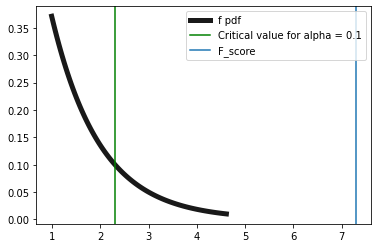

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import f
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2, 2997
x = np.linspace(f.pdf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'k', lw = 5, alpha = 0.9, label = 'f pdf')
plt.axvline(x = f.ppf(0.9, dfn, dfd), label = 'Critical value for alpha = 0.1', color = 'g')
plt.axvline(x = 7.30, label = 'F_score')
plt.legend();

### from the above, the value obtained is beyond the critical region and p-value also being very small as seen in the image, there is strong evidence to reject the null hypothesis. Hence, there is no significant difference in performance of students between math, reading and writing subjects

### Hypothesis II:

There is no relation between the gender of the students and their corresponding academic performance


H0: There is no relation between the gender of a student and their corresponding academic performance.

H1: There is a relation between the gender of a student and their corresponding academic performance.

In [60]:
# Using Chi-Square Test of Independence
Contingency_Table = pd.crosstab(student_df['gender'], student_df['Academic status'], margins = True)
Contingency_Table

Academic status,Failed,Passed,All
gender,,,
female,303,180,483
male,363,154,517
All,666,334,1000


In [61]:
observed_val = np.append(Contingency_Table.iloc[0][0:2].values,
                         Contingency_Table.iloc[1][0:2].values)
observed_val

array([303, 180, 363, 154])

In [62]:
overall_total = Contingency_Table.loc['All', 'All']
overall_total

1000

In [63]:
row_total = Contingency_Table.iloc[0:2,2].values
column_total = Contingency_Table.iloc[2, 0:2].values

In [64]:
Expected_values = []
for i in range(2):
  for j in range(2):
    Expected_values.append(row_total[i]*column_total[j]/overall_total)
Expected_values

[321.678, 161.322, 344.322, 172.678]

### DOF = (No. of rows - 1) * (No. of columns - 1) = (2-1)(2-1)

In [65]:
#Using library for Chi
from scipy.stats import chi2

In [66]:
dof = 1
chi_sq_val = np.sum((observed_val - Expected_values)**2/Expected_values)
print('Chi_square score is: ', chi_sq_val)
print('Chi_square critical is: ', chi2.ppf(0.9, dof))

Chi_square score is:  6.280617895500987
Chi_square critical is:  2.705543454095404


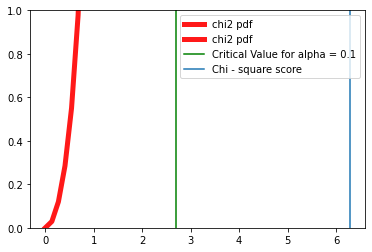

In [67]:
fig, ax = plt.subplots(1, 1)
dof = 1
x = np.linspace(chi2.ppf(0.01, dof), (chi2.ppf(0.99, dof), 1000))
ax.plot(x, chi2.ppf(x, dof),
        'r-', lw = 5, alpha = 0.9, label = 'chi2 pdf')
plt.axvline(x = chi2.ppf(0.9, dof), label = 'Critical Value for alpha = 0.1', color = 'g')
plt.axvline(6.280617895500987, label = 'Chi - square score')
plt.ylim(0, 1)
plt.legend()
plt.plot();

Inference from the above chi square analysis:

My chi square calculated value is greated than the chi square critical value, hence, i reject the null hypothesis. Therefore, i say there is no relation between the gender of a student and their corresponding academic performance

### LINEAR REGRESSION

In [68]:
from sklearn.linear_model import LinearRegression


In [69]:
#Regression data
reg_df = student_df[['math score', 'Total_Avg_Score']]
reg_df 

,math score,Total_Avg_Score
0,67,65.666667
1,40,51.333333
2,59,56.333333
3,77,74.333333
4,78,73.000000
...,...,...
995,73,69.333333
996,85,89.333333
997,32,36.000000
998,73,76.333333


In [70]:
from sklearn import linear_model
import statsmodels.api as sm

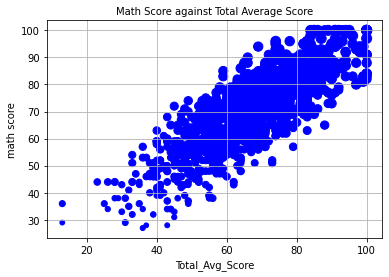

In [71]:
plt.scatter(student_df["math score"], student_df["reading score"], student_df['writing score'], color='blue')
plt.title('Math Score against Total Average Score', fontsize=10)
plt.xlabel('Total_Avg_Score', fontsize=10)
plt.ylabel('math score', fontsize=10)
plt.grid(True)
plt.show()

In [72]:
x = student_df[['math score', 'reading score', 'writing score']]
y = student_df['Total_Avg_Score']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -1.4210854715202004e-14
Coefficients: 
 [0.33333333 0.33333333 0.33333333]
                            OLS Regression Results                            
Dep. Variable:        Total_Avg_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.034e+32
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:44:37   Log-Likelihood:                 29862.
No. Observations:                1000   AIC:                        -5.972e+04
Df Residuals:                     996   BIC:                        -5.970e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



My regression analysis coefficient returned positive for all dependent variables, and a positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. Thus, it can be inferred that as the math score, reading score and writing score increase,  the total mean score also increases. 